In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
# df = pd.read_json('o1-mini_promptV2_1-112.json')
df = pd.read_json('modelOutputs3-11/o3-mini_promptv2_high_merged_withParams.json')
data = df['extractedText']

numEmpy = 0
processedData = []
for text in data:
    if text != []:
        for i in text:
            if not isinstance(i, str):
                processedData.append(i)
    else:
        numEmpy += 1

print(processedData)
print(numEmpy)
print(len(processedData))

extractedDataDF = pd.DataFrame(processedData)

extractedDataDF

[{'yield_strength_value': 260, 'yield_strength_units': 'MPa', 'ultimate_tensile_strength_value': 'NA', 'ultimate_tensile_strength_units': 'NA', 'ductility_value': 2.6, 'ductility_units': '%', 'hardness_value': 'NA', 'hardness_units': 'NA', 'modulus_value': 61.4, 'modulus_units': 'GPa', 'notes': 'He-sprayed Al6061 sample (Al-2-1) with improved particle impact velocity; shows significant tensile strength increase and ductility.', 'processing_parameters': {'material': 'Aluminum', 'material_series': '6061', 'material_composition': 'NA', 'gas_type': 'Helium', 'gas_velocity_value': 1110, 'gas_velocity_units': 'm/s', 'gas_pressure_value': 3.5, 'gas_pressure_units': 'MPa', 'gas_temperature_value': 400, 'gas_temperature_units': '°C', 'standoff_distance_value': 25.4, 'standoff_distance_units': 'mm', 'post_deposition_treatment': False, 'post_deposition_treatment_description': 'NA', 'nozzle_type': 'VRC® Nozzle 0071', 'material_depositions': 'Multiple passes using a raster pattern', 'cold_spray_sys

,yield_strength_value,yield_strength_units,ultimate_tensile_strength_value,ultimate_tensile_strength_units,ductility_value,ductility_units,hardness_value,hardness_units,modulus_value,modulus_units,notes,processing_parameters
0,260,MPa,NA,NA,2.6,%,NA,NA,61.4,GPa,He-sprayed Al6061 sample (Al-2-1) with improve...,"{'material': 'Aluminum', 'material_series': '6..."
1,160,MPa,220,MPa,4.5,%,36,HRB,NA,NA,"Minimum Yield Strength, Minimum Elongation at ...",NaN
2,NA,NA,100,MPa,NA,NA,85,HV0.3,NA,NA,As-sprayed deposit from solution-annealed (pAS...,"{'material': 'Aluminum', 'material_series': '6..."
3,NA,NA,75,MPa,NA,NA,69,HV0.3,NA,NA,As-sprayed deposit from solution-annealed (pAS...,"{'material': 'Aluminum', 'material_series': '6..."
4,250.3,MPa,268.2,MPa,1.2,%,NA,NA,54.5,GPa,As-sprayed AL 6061 from processing set I (long...,"{'material': 'Aluminum', 'material_series': '6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
175,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Pratt & Whitney Rocketdyne evaluated cold spra...,"{'material': 'Aluminum', 'material_series': '6..."
176,NA,NA,NA,NA,NA,NA,84.7,HV,NA,NA,Results from cold‐sprayed as‐received Al6061 o...,"{'material': 'Aluminum', 'material_series': '6..."
177,NA,NA,NA,NA,NA,NA,69.3,HV,NA,NA,Results from cold‐sprayed solution heat‐treate...,"{'material': 'Aluminum', 'material_series': '6..."
178,NA,NA,NA,NA,NA,NA,195.4,Hv0.1,NA,NA,Minimum microhardness recorded for cold‐spraye...,"{'material': 'Copper', 'material_series': 'NA'..."


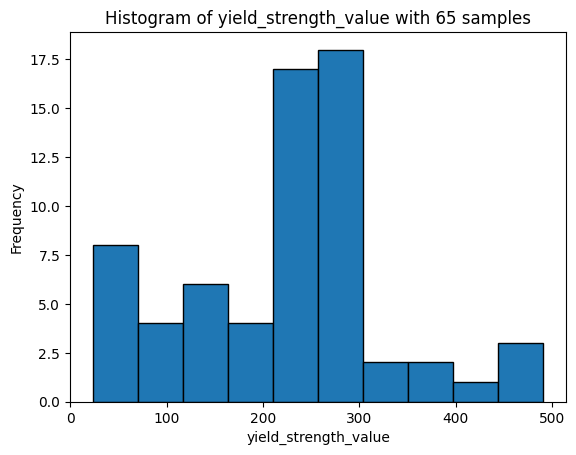

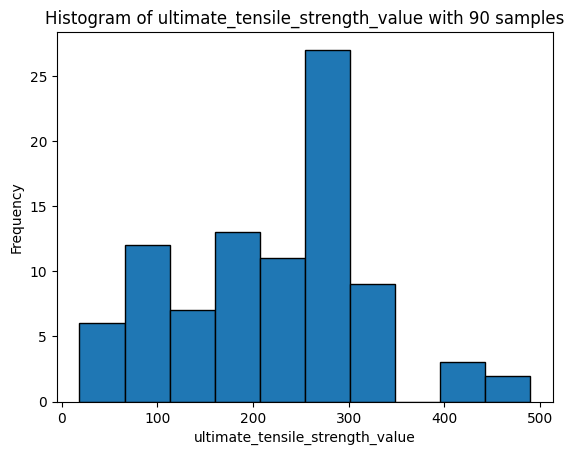

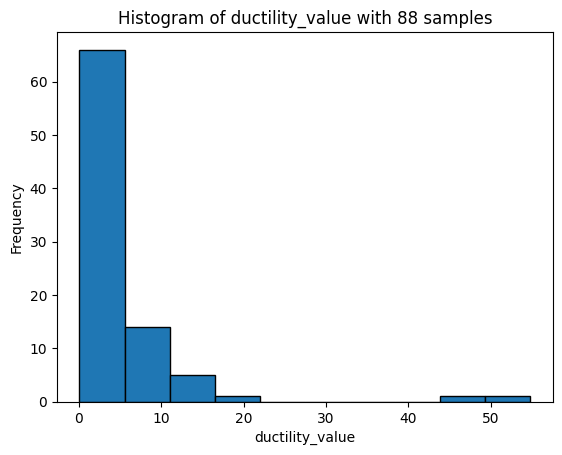

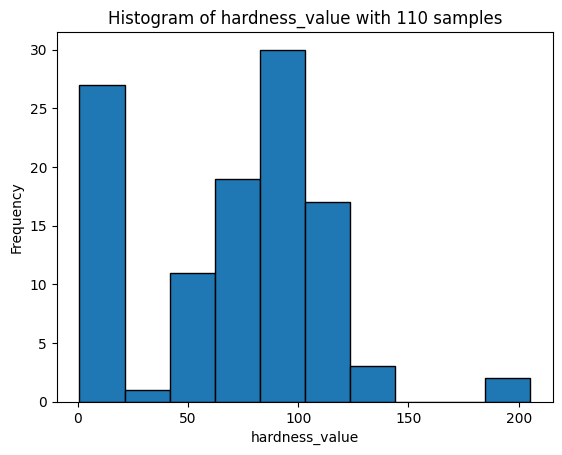

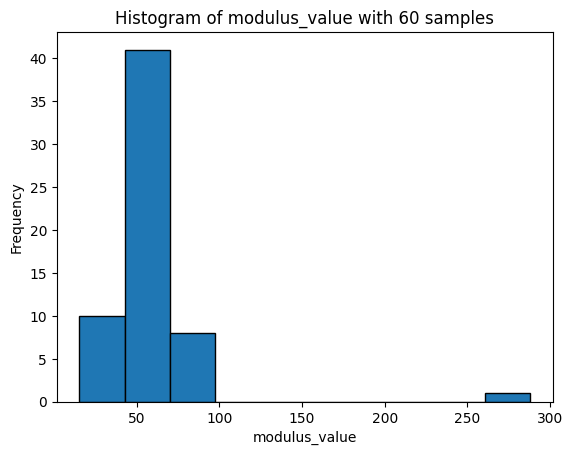

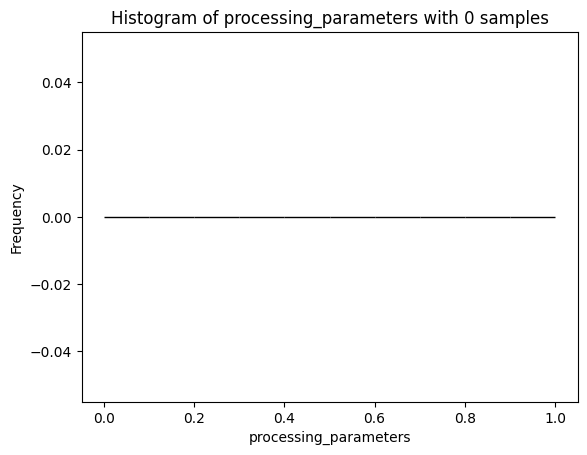

In [8]:
for column in extractedDataDF.columns:
    if column != 'notes' and "units" not in column:
        col_data = pd.to_numeric(extractedDataDF[column], errors='coerce').dropna()  # Convert to numeric and drop NaN
        
        plt.figure()

        # Plot histogram with 10 bins
        plt.hist(col_data, bins=10, edgecolor='black')

        # Add title and labels for clarity
        plt.title(f'Histogram of {column} with {len(col_data)} samples')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Display the plot
        plt.show()



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON file
df = pd.read_json('modelOutputs3-11/o3-mini_promptv2_high_merged_withParams.json')
data = df['extractedText']

numEmpty = 0
processedParams = []

# Loop over the 'extractedText' data in each record
for text in data:
    if text != []:
        for item in text:
            # Check if the item is a dictionary and has 'processing_parameters'
            if isinstance(item, dict) and 'processing_parameters' in item:
                processedParams.append(item['processing_parameters'])
    else:
        numEmpty += 1

print("Extracted processing_parameters dictionaries:")
print(processedParams)
print("\nNumber of empty 'extractedText' entries:", numEmpty)
print("Total processing_parameters records:", len(processedParams))

# Create a DataFrame from the processing parameters dictionaries
paramsDF = pd.DataFrame(processedParams)
print("\nDataFrame of processing parameters:")
# print(paramsDF)

# Plot histograms for numeric columns (ignoring keys like 'notes' and those with 'units' in their name)
for column in paramsDF.columns:
    if column != 'notes' and "units" not in column:
        # Attempt to convert the column to numeric values; non-numeric values become NaN
        print(paramsDF[column].value_counts(dropna=False))
        print('-'*50)
        # col_data = pd.to_numeric(paramsDF[column], errors='coerce').dropna()
        # if not col_data.empty:
        #     plt.figure()
        #     plt.hist(col_data, bins=10, edgecolor='black')
        #     plt.title(f'Histogram of {column} with {len(col_data)} samples')
        #     plt.xlabel(column)
        #     plt.ylabel('Frequency')
        #     plt.show()


Extracted processing_parameters dictionaries:
[{'material': 'Aluminum', 'material_series': '6061', 'material_composition': 'NA', 'gas_type': 'Helium', 'gas_velocity_value': 1110, 'gas_velocity_units': 'm/s', 'gas_pressure_value': 3.5, 'gas_pressure_units': 'MPa', 'gas_temperature_value': 400, 'gas_temperature_units': '°C', 'standoff_distance_value': 25.4, 'standoff_distance_units': 'mm', 'post_deposition_treatment': False, 'post_deposition_treatment_description': 'NA', 'nozzle_type': 'VRC® Nozzle 0071', 'material_depositions': 'Multiple passes using a raster pattern', 'cold_spray_system': 'VRC® Gen III Max', 'heat_treated': False, 'heat_treatment_description': 'NA', 'powder_vendor': 'Valimet®', 'powder_processed': True, 'powder_processing_description': 'Heat treated in air at 230°C for one hour and stored in a dry nitrogen glovebox'}, {'material': 'Aluminum', 'material_series': '6061', 'material_composition': 'NA', 'gas_type': 'Nitrogen', 'gas_velocity_value': 'NA', 'gas_velocity_units

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON file
df = pd.read_json('modelOutputs3-11/o3-mini_promptv2_high_merged_withParams.json')
data = df['extractedText']

numEmpty = 0
processedParams = []

# Loop over the 'extractedText' data in each record
for text in data:
    if text != []:
        for item in text:
            # Check if the item is a dictionary and has 'processing_parameters'
            if isinstance(item, dict) and 'processing_parameters' in item:
                processedParams.append(item['processing_parameters'])
    else:
        numEmpty += 1

print("Extracted processing_parameters dictionaries:")
# print(processedParams)
print("\nNumber of empty 'extractedText' entries:", numEmpty)
print("Total processing_parameters records:", len(processedParams))

# Create a DataFrame from the processing parameters dictionaries
paramsDF = pd.DataFrame(processedParams)
print("\nDataFrame of processing parameters:")
# print(paramsDF)

# Plot histograms for numeric columns (ignoring keys like 'notes' and those with 'units' in their name)
for column in paramsDF.columns:
    if column != 'notes' and "units" not in column:
        print(f"Value counts for column '{column}':")
        print(len(paramsDF[column]))
        print(paramsDF[column].value_counts(dropna=False))
        na_count = paramsDF[column].isna().sum()
        print(f"Number of NA values in column '{column}': {na_count}")
        print('-'*50)


Extracted processing_parameters dictionaries:

Number of empty 'extractedText' entries: 43
Total processing_parameters records: 179

DataFrame of processing parameters:
Value counts for column 'material':
179
material
Aluminum         176
Al-based BMG       1
Aluminum 6061      1
Copper             1
Name: count, dtype: int64
Number of NA values in column 'material': 0
--------------------------------------------------
Value counts for column 'material_series':
179
material_series
6061          165
6061-T6         4
NA              4
2618            2
6061-T651       1
6A01-T5         1
6061, 5056      1
6061T6          1
Name: count, dtype: int64
Number of NA values in column 'material_series': 0
--------------------------------------------------
Value counts for column 'material_composition':
179
material_composition
NA                                                                                                                                                                       

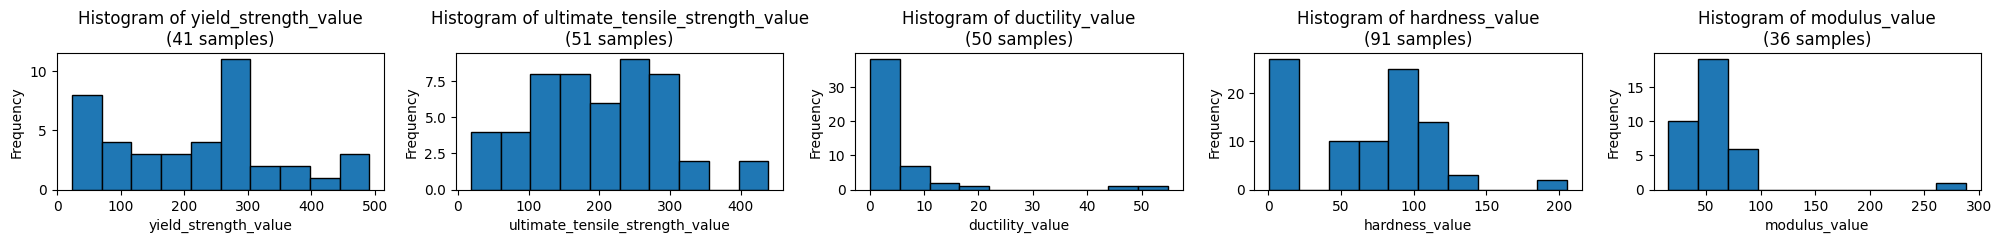

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter columns that meet criteria (not 'notes' and do not contain 'units')
columns_to_plot = [
    column for column in extractedDataDF.columns 
    if column != 'notes' and "units" not in column
]

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3,6, figsize=(24, 6))  # Adjust figure size as needed

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Loop through each column and corresponding axis
for ax, column in zip(axes, columns_to_plot):
    # Convert column to numeric and drop non-numeric/NaN values
    col_data = pd.to_numeric(extractedDataDF[column], errors='coerce').dropna()

    # Plot histogram on the current axis with 10 bins
    ax.hist(col_data, bins=10, edgecolor='black')

    # Add title and labels for clarity
    ax.set_title(f'Histogram of {column}\n({len(col_data)} samples)')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# If there are unused subplots, hide them
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display the grid of plots
plt.tight_layout()
plt.show()


In [50]:
# df[['gas type']].nunique()#, 'powder heat treatment', 'post-deposition heat treatment']].nunique()
df = pd.read_json('modelOutputs/o1-mini_marcoPrompt1-31-25_merged.json')
data = df['extractedText']

numEmpy = 0
processedData = []
for text in data:
    if text != []:
        for i in text:
            if not isinstance(i, str):
                processedData.append(i)
    else:
        numEmpy += 1

# print(processedData)
# print(numEmpy)
# print(len(processedData))

extractedDataDF = pd.DataFrame(processedData)

# print(extractedDataDF['powder heat treatment'])
print(extractedDataDF['post-deposition heat treatment'].nunique())
print('-'*30)
print(extractedDataDF['post-deposition heat treatment'].value_counts())  # counts the number of occurrences of

36
------------------------------
post-deposition heat treatment
NA                                                                                                                                                        58
as-sprayed                                                                                                                                                 5
As-sprayed                                                                                                                                                 5
Hotplate at 500°C                                                                                                                                          4
grit blasted and solvent cleaned prior to spraying                                                                                                         4
Heat treated at 176°C                                                                                                                                 